## import libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## data ingestion

In [4]:
train_df = pd.read_excel('/media/tinku/Education/iNEURON/ML/Projects/flight_fare_prediction/archive/Data_Train.xlsx')

In [5]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

## Properties and nature of data

In [7]:
train_df.shape

(10683, 11)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


### Observations:

- Dataset has 11 features out of which *"Price"* is the Dependent feature and rest are independent features.

- Dataset has more than 10k rows, so we can eliminate the missing or null values.

- All the Independent features are of "object" type. So we need to apply tupe-casting or mapping or encoding to convert them into usefull values for our Model Algorithm.

## null values



In [10]:

train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
train_df[train_df.Route.isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [12]:
train_df[train_df.Total_Stops.isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


#### Comment:

Since there are very few NaN value, we can simply drop them. It will not cause any major problem.

In [13]:
train_df.dropna(inplace=True)

In [14]:
train_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Analysis and Processing of Dependent feature

In [15]:
train_df.Price.value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: Price, Length: 1870, dtype: int64

#### Comment:

- As the Price column (Dependent feature) contains continuous integer values, so it is a Regression problem statement.



## Analysis and Processing of Independent features

In [16]:
for col in train_df.columns:
    if col != 'Price':
        print(f"Feature Name : {col}")
        print('\n', train_df[col].unique())
        print('\n', "Total number of unique values = ", len(train_df[col].unique()))
        print('\n', train_df[col].value_counts())
        print('\n', '=*'*40, '\n')

Feature Name : Airline

 ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']

 Total number of unique values =  12

 Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

 =*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=* 

Feature Name : Date_of_Journey

 ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '

### Observations:

- **Airline:**  This dataset has 12 different Airlines but imbalanced in nature and can be considered as **Nominal data (Catagorical)** . We just need to encode them with **OneHotEncoder**.


- **Date_of_Journey:**  This feature is the most important one as the flight fare changes rapidly depending on which moth of the year one wants to travel. We need to make two new columns named "Day" and "Month" using this feature and use those two features for prediction.


- **Source:**  There are 5 Source options and can be considered as **Nominal data (Catagorical)** . We just need to encode them with **OneHotEncoder**.


- **Destination:**  There are 6 Destination optionsand can be considered as **Nominal data (Catagorical)** . We just need to encode them with **OneHotEncoder**.


- **Route:**  There are 128 different Route data available but it is imbalanced in nature. Also this feature is quite similar with the feature named "Total_Stops", so we can drop this features.


- **Dep_Time:**  There is no inconsistent values in this feature and just need to convert those values into useful numerical values.


- **Arrival_Time:**  This feature has few values that contains date along with time. We need to modify those and convert this feature into useful numerical values.


- **Duration:**  This feature needs to be modified into integer using simple time conversion function.


- **Total_Stops:**  This feature has 5 different values and can be considered as **Ordinal data (Catagorical)** that can be easily mapped or encoded using **LabelEncoder** and this will play an important role in "Fare prediction". 


- **Additional_Info:** More than 80% data has no "Aditional info". So this feature is not important  and can be dropped.



## EDA & FE

### Modify Date_of_Journey

In [17]:
# change data type from object to datetime
train_df.Date_of_Journey = pd.to_datetime(train_df.Date_of_Journey, dayfirst=True)

In [18]:
train_df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [19]:
# creating Day and Month columns that contain integer values
train_df["Day"] = train_df.Date_of_Journey.dt.day
train_df["Month"] = train_df.Date_of_Journey.dt.month

# Dropping "Date_of_Journey" column as it is not required anymore
train_df.drop(columns=["Date_of_Journey"], inplace=True)

train_df.head(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


### Modify Dep_Time

In [20]:
# change data type of Dep_Time from object to datetime
train_df.Dep_Time = pd.to_datetime(train_df.Dep_Time)

In [21]:
train_df.dtypes

Airline                    object
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Day                         int64
Month                       int64
dtype: object

In [22]:
# create two seperate columnsnamed "Dep_hr" and "Dep_min"
train_df["Dep_hr"] = train_df.Dep_Time.dt.hour
train_df["Dep_min"] = train_df.Dep_Time.dt.minute

In [23]:
# converting "Dep_Time" column into float values
train_df.Dep_Time = train_df.Dep_Time.apply(lambda x: float(str(x).split(" ")[-1].replace(":", ".")[:5]))

In [24]:
train_df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22.20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,5.50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,9.25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25


### Modify Arrival_Time 

In [25]:
train_df.Arrival_Time = pd.to_datetime(train_df.Arrival_Time)

In [26]:
# create two seperate columnsnamed "Arrival_hr" and "Arrival_min"
train_df["Arrival_hr"] = train_df.Arrival_Time.dt.hour
train_df["Arrival_min"] = train_df.Arrival_Time.dt.minute

In [27]:
# converting "Dep_Time" column into float values
train_df.Arrival_Time = train_df.Arrival_Time.apply(lambda x: float(str(x).split(" ")[-1].replace(":", ".")[:5]))

In [28]:
train_df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22.20,1.10,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,5.50,13.15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,9.25,4.25,19h,2 stops,No info,13882,9,6,9,25,4,25


#### Comment:

In case of "Dep_Time" and "Arrival_Time" we have created two seperate columns named "he" and "min" containing integer values and converted the original column into float values. 

We will train our model seperately with integer values as well as the float values and will proceed with the model with best accuracy.

### Modify Duration Feature

In [29]:
# we can convert all the values into equivallent value in min
def duration_in_min(dur):
    tt = 0
    for i in dur.split():
        if 'h' in i:
            tt += int(i[:-1])*60
        if 'm' in i:
            tt += int(i[:-1])
    return tt

train_df.Duration = train_df.Duration.apply(duration_in_min)
train_df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22.20,1.10,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,5.50,13.15,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,9.25,4.25,1140,2 stops,No info,13882,9,6,9,25,4,25


### Analysis of Categorical features

In [30]:
train_df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

#### Comment:

As last four i.e. **Multiple carriers Premium economy , Jet Airways Business, Vistara Premium economy, Trujet** has very few data points to train any model, so we can drop them.

In [31]:
l = ['Multiple carriers Premium economy' , 'Jet Airways Business', 'Vistara Premium economy', 'Trujet']

train_df_airline = train_df[train_df.Airline.isin(l) == False]

In [32]:
train_df_airline.Airline.value_counts()

Jet Airways          3849
IndiGo               2053
Air India            1751
Multiple carriers    1196
SpiceJet              818
Vistara               479
Air Asia              319
GoAir                 194
Name: Airline, dtype: int64

#### Checking for available airlines from each source

In [33]:
for s in train_df.Source.unique():
    print("Airlines available from" , s, '\n')
    print(train_df[train_df.Source == s].Airline.value_counts())
    print('\n', "*"*50)

Airlines available from Banglore 

Jet Airways                788
IndiGo                     523
Air India                  332
Vistara                    185
SpiceJet                   181
GoAir                       93
Air Asia                    89
Jet Airways Business         4
Vistara Premium economy      2
Name: Airline, dtype: int64

 **************************************************
Airlines available from Kolkata 

Jet Airways    1256
Air India       512
IndiGo          445
SpiceJet        300
Vistara         183
Air Asia        150
GoAir            25
Name: Airline, dtype: int64

 **************************************************
Airlines available from Delhi 

Jet Airways                          1586
Multiple carriers                    1196
Air India                             746
IndiGo                                705
SpiceJet                               87
Air Asia                               80
GoAir                                  76
Vistara                 

#### Comment:

- All "Airline" options are not available from all the source Airports.

- We can make seperate dataset for each Airline and build model for each.

- Using those models we can predict the Flight Fare from any paricular Airport for different Airlines and show those results.

### Encoding "Source" and "Destination" using OneHotEncoder

In [34]:
train_df = pd.get_dummies(train_df, columns=["Source", "Destination"])

In [35]:
train_df.head(3)

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,BLR → DEL,22.20,1.10,170,non-stop,No info,3897,24,3,...,0,0,0,0,0,0,0,0,0,1
1,Air India,CCU → IXR → BBI → BLR,5.50,13.15,445,2 stops,No info,7662,1,5,...,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,DEL → LKO → BOM → COK,9.25,4.25,1140,2 stops,No info,13882,9,6,...,0,1,0,0,0,1,0,0,0,0


### Encoding "Total_Stops" using LabelEncoder

In [36]:
# Unique values in "Total_Stops" before encoding
train_df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df.Total_Stops = le.fit_transform(train_df["Total_Stops"])

In [38]:
# Unique values in "Total_Stops" after encoding
train_df.Total_Stops.unique()

array([4, 1, 0, 2, 3])

### Dropping unnecessary features

In [39]:
train_df.drop(columns=["Route", "Additional_Info"], inplace=True)

## Final look of dataset after complition of EDA & FE

In [40]:
train_df.head()

,Airline,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month,Dep_hr,Dep_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,22.20,1.10,170,4,3897,24,3,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,5.50,13.15,445,1,7662,1,5,5,50,...,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,9.25,4.25,1140,1,13882,9,6,9,25,...,0,1,0,0,0,1,0,0,0,0
3,IndiGo,18.05,23.30,325,0,6218,12,5,18,5,...,0,0,1,0,1,0,0,0,0,0
4,IndiGo,16.50,21.35,285,0,13302,1,3,16,50,...,0,0,0,0,0,0,0,0,0,1


In [41]:
train_df.shape

(10682, 23)

In [42]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Airline                10682 non-null  object 
 1   Dep_Time               10682 non-null  float64
 2   Arrival_Time           10682 non-null  float64
 3   Duration               10682 non-null  int64  
 4   Total_Stops            10682 non-null  int64  
 5   Price                  10682 non-null  int64  
 6   Day                    10682 non-null  int64  
 7   Month                  10682 non-null  int64  
 8   Dep_hr                 10682 non-null  int64  
 9   Dep_min                10682 non-null  int64  
 10  Arrival_hr             10682 non-null  int64  
 11  Arrival_min            10682 non-null  int64  
 12  Source_Banglore        10682 non-null  uint8  
 13  Source_Chennai         10682 non-null  uint8  
 14  Source_Delhi           10682 non-null  uint8  
 15  So

## Independent Features Selection

### **We will consider following conditions while selecting Independent features and build model for each case:**

- **CASE-1:** 
        - We can apply OneHotEncoder on **Airlines** and train our model.  
        - We will keep Dep_time & Arrival_time with float values and drop four featurs named Dep_hr, Dep_min, 
        Arrival_hr, Arrival_min with int values
        - This model will predict Flight Fare for a particular Airline given as an input by the user.
        

- **CASE-2:** 
        - We can apply OneHotEncoder on **Airlines** and train our model.  
        - We will drop Dep_time & Arrival_time and keep four featurs named Dep_hr, Dep_min, Arrival_hr, 
            Arrival_min with int values
        - This model will predict Flight Fare for a particular Airline given as an input by the user.


- **CASE-3:**
        - We can create seperate data groups for different Airlines and build seperate Models for each Airlines.
        - These models will take Deperture Date-time, Arrival Date-time, Source, Destinations, Total_Stops as inputs 
        and show the Predicted Fare for each of the available Airlines for the given Route.

In [43]:
train_df.head(3)

,Airline,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month,Dep_hr,Dep_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,22.20,1.10,170,4,3897,24,3,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,5.50,13.15,445,1,7662,1,5,5,50,...,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,9.25,4.25,1140,1,13882,9,6,9,25,...,0,1,0,0,0,1,0,0,0,0


In [44]:
train_df_Airline_encoded = pd.get_dummies(train_df, columns=["Airline"])

In [45]:
train_df_Airline_encoded.head(3)

,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month,Dep_hr,Dep_min,Arrival_hr,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,22.20,1.10,170,4,3897,24,3,22,20,1,...,0,1,0,0,0,0,0,0,0,0
1,5.50,13.15,445,1,7662,1,5,5,50,13,...,0,0,0,0,0,0,0,0,0,0
2,9.25,4.25,1140,1,13882,9,6,9,25,4,...,0,0,1,0,0,0,0,0,0,0


In [46]:
train_df_Airline_encoded.columns

Index(['Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Price', 'Day',
       'Month', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy'],
      dtype='object')

#### Data Preperation for CASE-1

In [47]:
train_df_case1 = train_df_Airline_encoded[['Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Price', 'Day',
       'Month', 'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy']]

In [48]:
train_df_case1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Dep_Time                                   10682 non-null  float64
 1   Arrival_Time                               10682 non-null  float64
 2   Duration                                   10682 non-null  int64  
 3   Total_Stops                                10682 non-null  int64  
 4   Price                                      10682 non-null  int64  
 5   Day                                        10682 non-null  int64  
 6   Month                                      10682 non-null  int64  
 7   Source_Banglore                            10682 non-null  uint8  
 8   Source_Chennai                             10682 non-null  uint8  
 9   Source_Delhi                               10682 non-null  uint8  
 10  Source_Kolkata        

#### Data Preperation for CASE-2

In [49]:
train_df_case2 = train_df_Airline_encoded[['Duration', 'Total_Stops', 'Price', 'Day',
       'Month', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy']]

In [50]:
train_df_case2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Duration                                   10682 non-null  int64
 1   Total_Stops                                10682 non-null  int64
 2   Price                                      10682 non-null  int64
 3   Day                                        10682 non-null  int64
 4   Month                                      10682 non-null  int64
 5   Dep_hr                                     10682 non-null  int64
 6   Dep_min                                    10682 non-null  int64
 7   Arrival_hr                                 10682 non-null  int64
 8   Arrival_min                                10682 non-null  int64
 9   Source_Banglore                            10682 non-null  uint8
 10  Source_Chennai                             106

## Graphical Analysis of Independent and Dependent Features

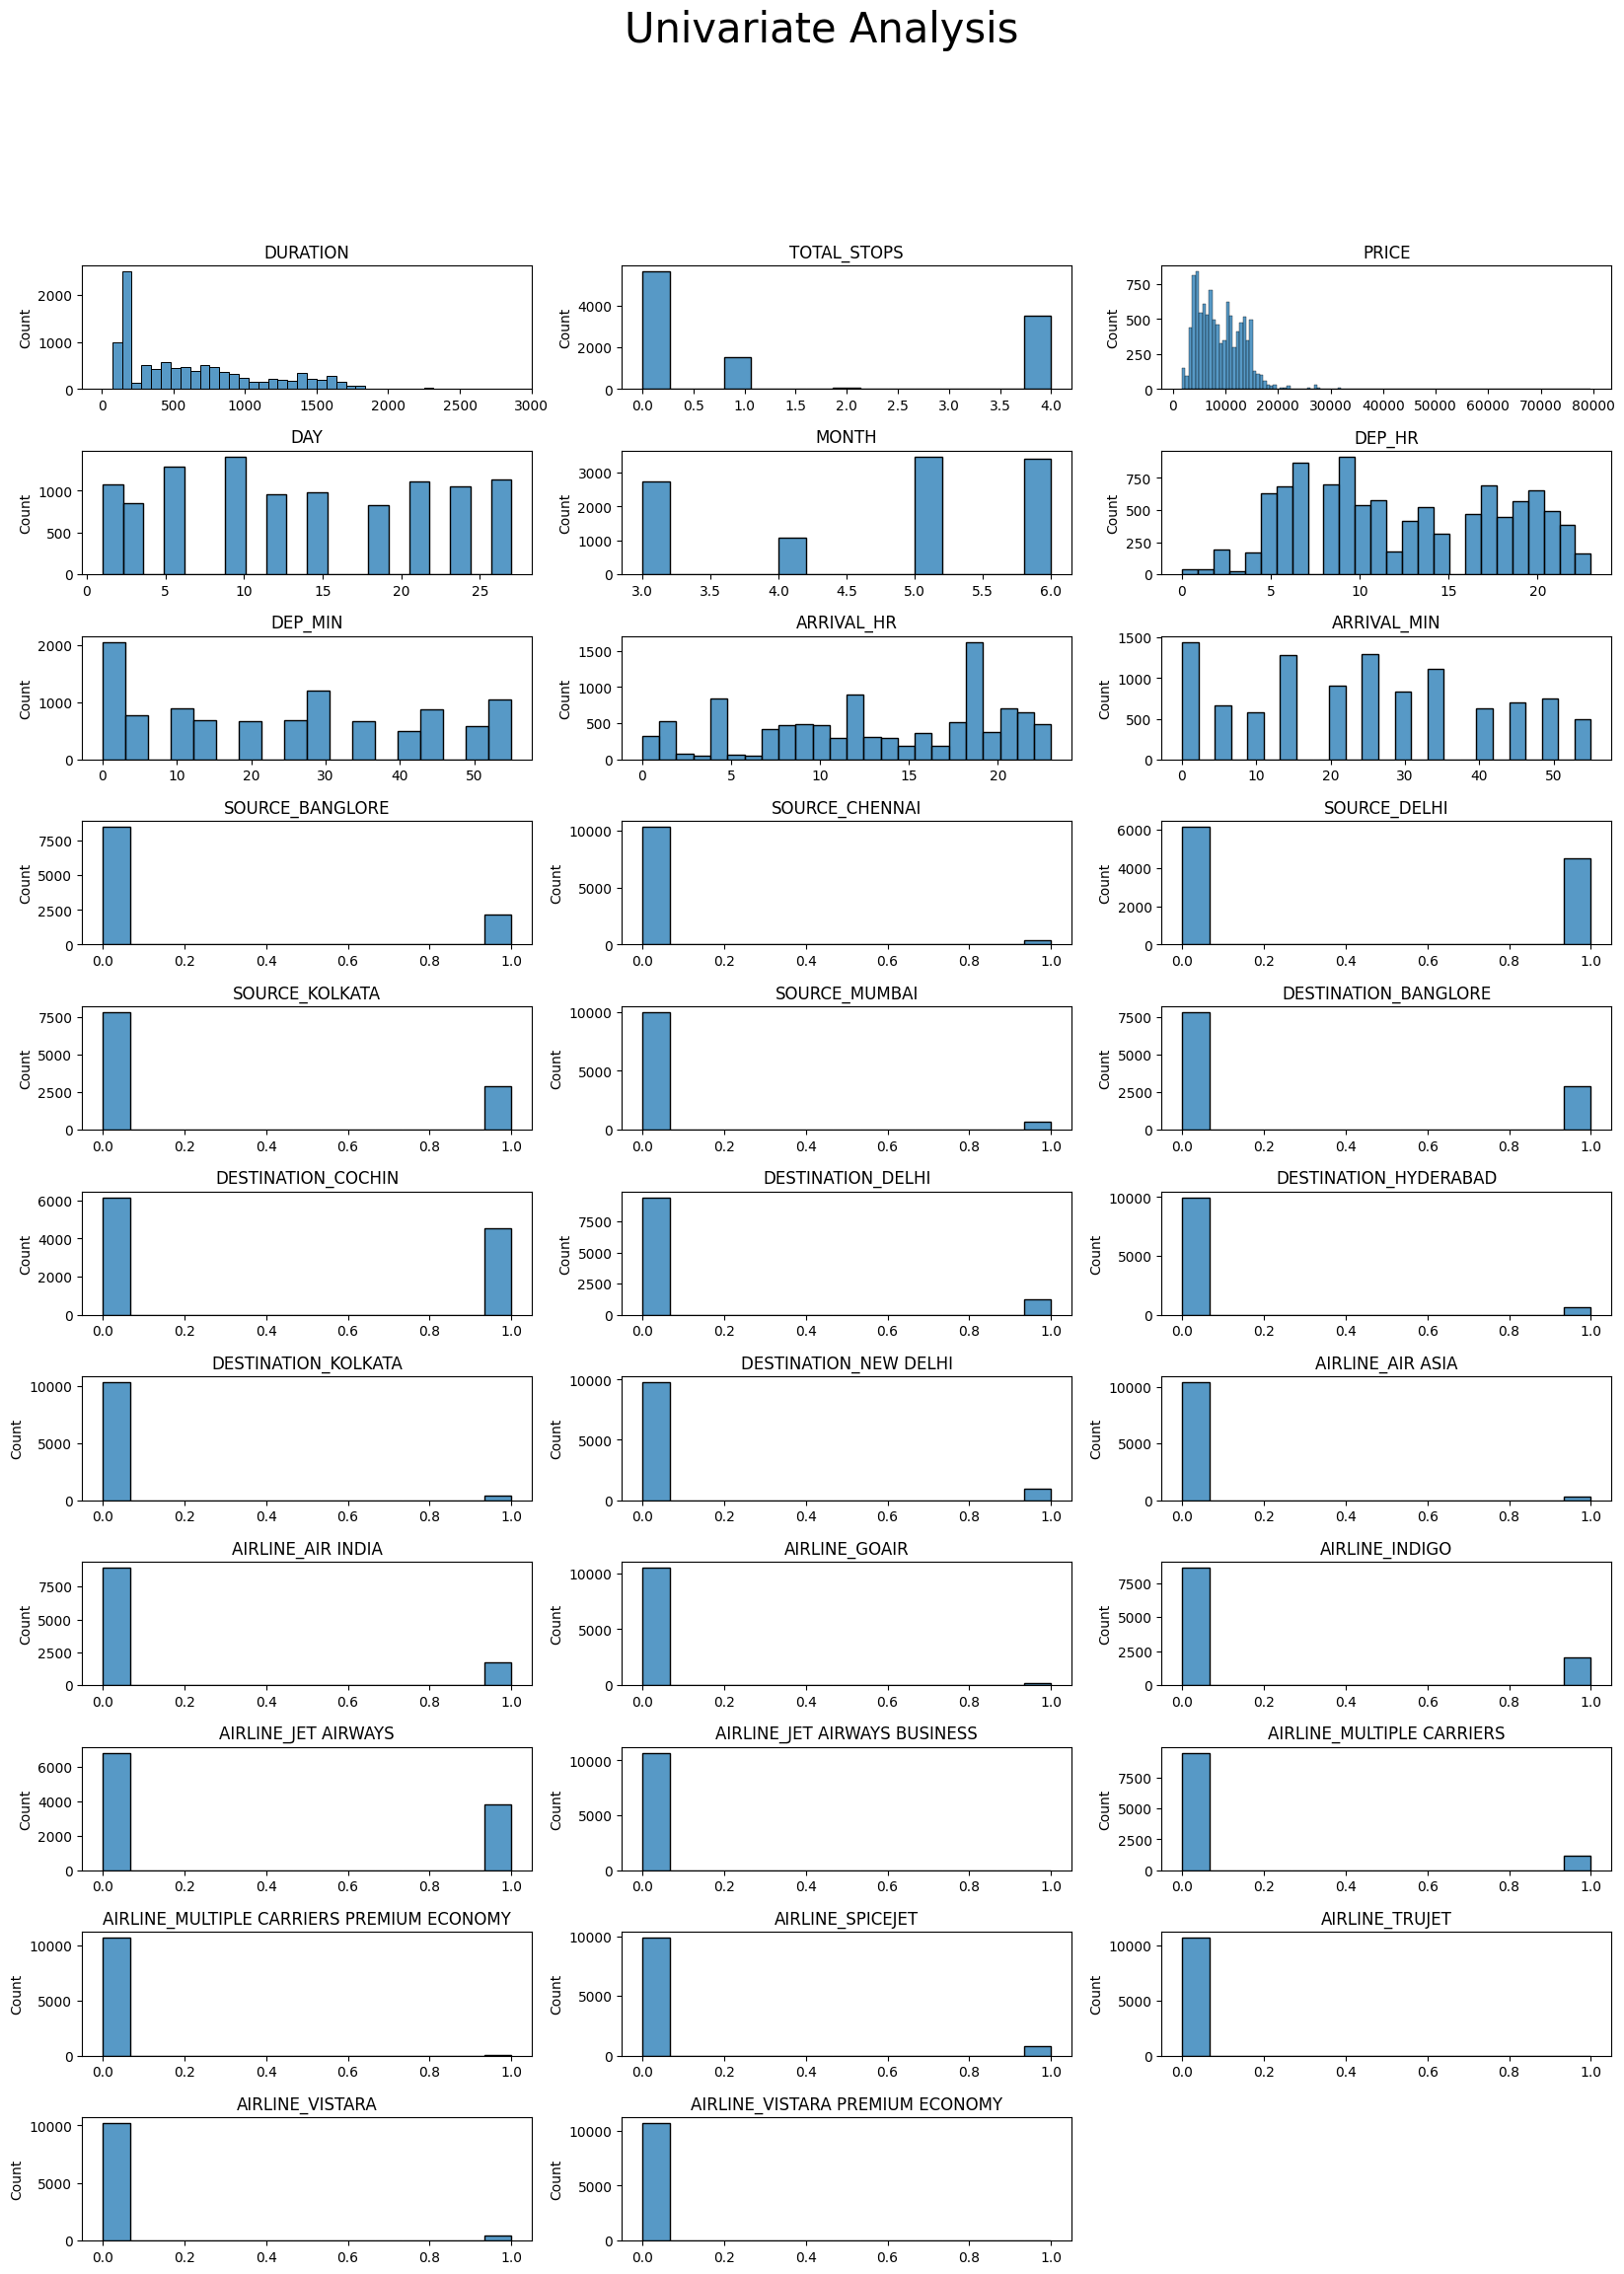

In [51]:
plt.figure(figsize=(20, 26))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Univariate Analysis", fontsize=30, ha='center', va='top')

# loop through the length of tickers and keep track of index
for n, col in enumerate(train_df_case2.columns):
    # add a new subplot iteratively
    ax = plt.subplot(11, 3, n + 1)

    # filter df and plot ticker on the new subplot axis
    sns.histplot(data=train_df_case2[col])
    # chart formatting
    ax.set_title(col.upper())
    ax.set_xlabel("")

    

### Multicollinearity

In [52]:
#plot color scaled correlation matrix
corr=train_df_case2.iloc[:,:].corr()
corr.style.background_gradient(cmap='coolwarm')

,Duration,Total_Stops,Price,Day,Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
Duration,1.000000,-0.602282,0.506480,-0.022439,0.014836,0.002088,-0.019099,0.051531,-0.069663,-0.267239,-0.190651,0.295776,0.124437,-0.234809,0.124437,0.295776,-0.340182,-0.234809,-0.190651,0.006732,-0.101836,0.261553,-0.092147,-0.343503,0.305519,-0.011968,-0.012063,-0.002508,-0.263434,-0.008537,-0.019033,-0.016163
Total_Stops,-0.602282,1.000000,-0.571221,0.029225,-0.026328,0.039224,0.048901,-0.095650,0.175980,0.397025,0.270634,-0.482296,-0.113010,0.315130,-0.113010,-0.482296,0.515760,0.315130,0.270634,-0.021872,0.081551,-0.007335,0.033030,0.261658,-0.262310,-0.014764,-0.276971,-0.028182,0.289853,-0.007812,0.089530,0.023586
Price,0.506480,-0.571221,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,-0.118044,-0.179223,0.270676,0.009358,-0.230755,0.009358,0.270676,-0.313417,-0.230755,-0.179223,0.189777,-0.133050,0.050432,-0.095151,-0.361070,0.416124,0.253303,0.139793,0.017650,-0.296565,-0.010381,-0.060654,-0.000454
Day,-0.022439,0.029225,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.050438,0.006611,0.100088,-0.060558,-0.014030,-0.060558,0.100088,0.002632,-0.014030,0.006611,-0.075254,0.008926,-0.032490,-0.003122,0.007281,-0.017304,-0.031713,0.042163,0.030839,0.022154,-0.008569,-0.013169,-0.020115
Month,0.014836,-0.026328,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,-0.244418,0.005650,0.139222,0.087177,-0.039352,0.087177,0.139222,0.090490,-0.039352,0.005650,-0.453685,0.005652,-0.045981,-0.004494,-0.048504,0.059735,-0.034787,0.053685,-0.051222,-0.011977,-0.014199,-0.017252,-0.019797
Dep_hr,0.002088,0.039224,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,-0.007887,-0.014846,-0.118780,0.155471,-0.017292,0.155471,-0.118780,0.009469,-0.017292,-0.014846,-0.022138,0.045960,-0.012879,-0.016373,-0.023395,0.113942,-0.007524,-0.149992,-0.028672,-0.010451,0.000857,0.023906,-0.003375
Dep_min,-0.019099,0.048901,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,0.077354,0.067110,-0.085534,-0.024238,0.037705,-0.024238,-0.085534,0.003200,0.037705,0.067110,0.107129,0.158211,-0.045688,0.076751,-0.014714,0.024455,0.009168,-0.109370,-0.004624,0.092634,-0.010007,-0.077903,-0.011380
Arrival_hr,0.051531,-0.095650,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,-0.024419,-0.014795,-0.006790,0.054693,-0.033512,0.054693,-0.006790,-0.030867,-0.033512,-0.014795,0.000366,-0.034993,0.088872,0.018526,-0.071491,-0.027377,-0.014456,0.067930,0.013491,-0.090058,0.003739,0.068834,0.000776
Arrival_min,-0.069663,0.175980,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,0.090993,-0.030493,-0.209882,0.118573,0.081196,0.118573,-0.209882,0.095250,0.081196,-0.030493,0.021271,0.078261,0.061231,0.096839,0.035124,-0.057698,0.005232,-0.167455,-0.001786,0.012543,-0.002750,0.069422,0.000314
Source_Banglore,-0.267239,0.397025,-0.118044,-0.050438,-0.244418,-0.007887,0.077354,-0.024419,0.090993,1.000000,-0.097862,-0.437149,-0.308498,-0.134441,-0.308498,-0.437149,0.720278,-0.134441,-0.097862,0.607598,0.031828,-0.017601,0.092099,0.059224,-0.001754,0.027038,-0.180681,-0.017762,0.011113,-0.004924,0.096785,0.019116


<AxesSubplot: >

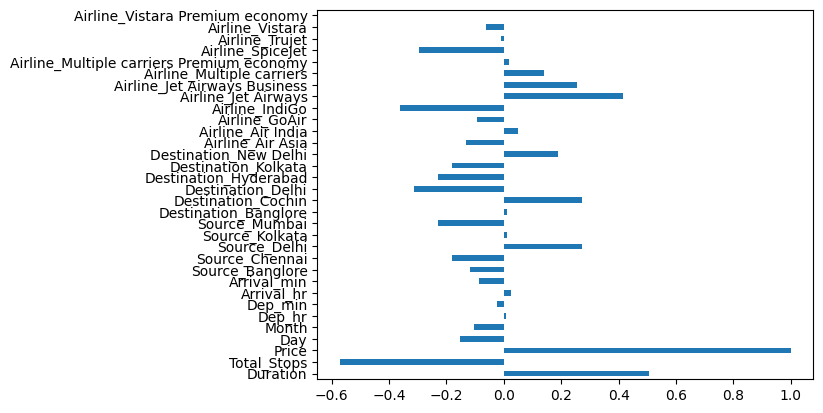

In [53]:
corr.Price.plot(kind='barh')

#### Comment:

Most important Independent Features are **Total_Stops & Duration**

<AxesSubplot: >

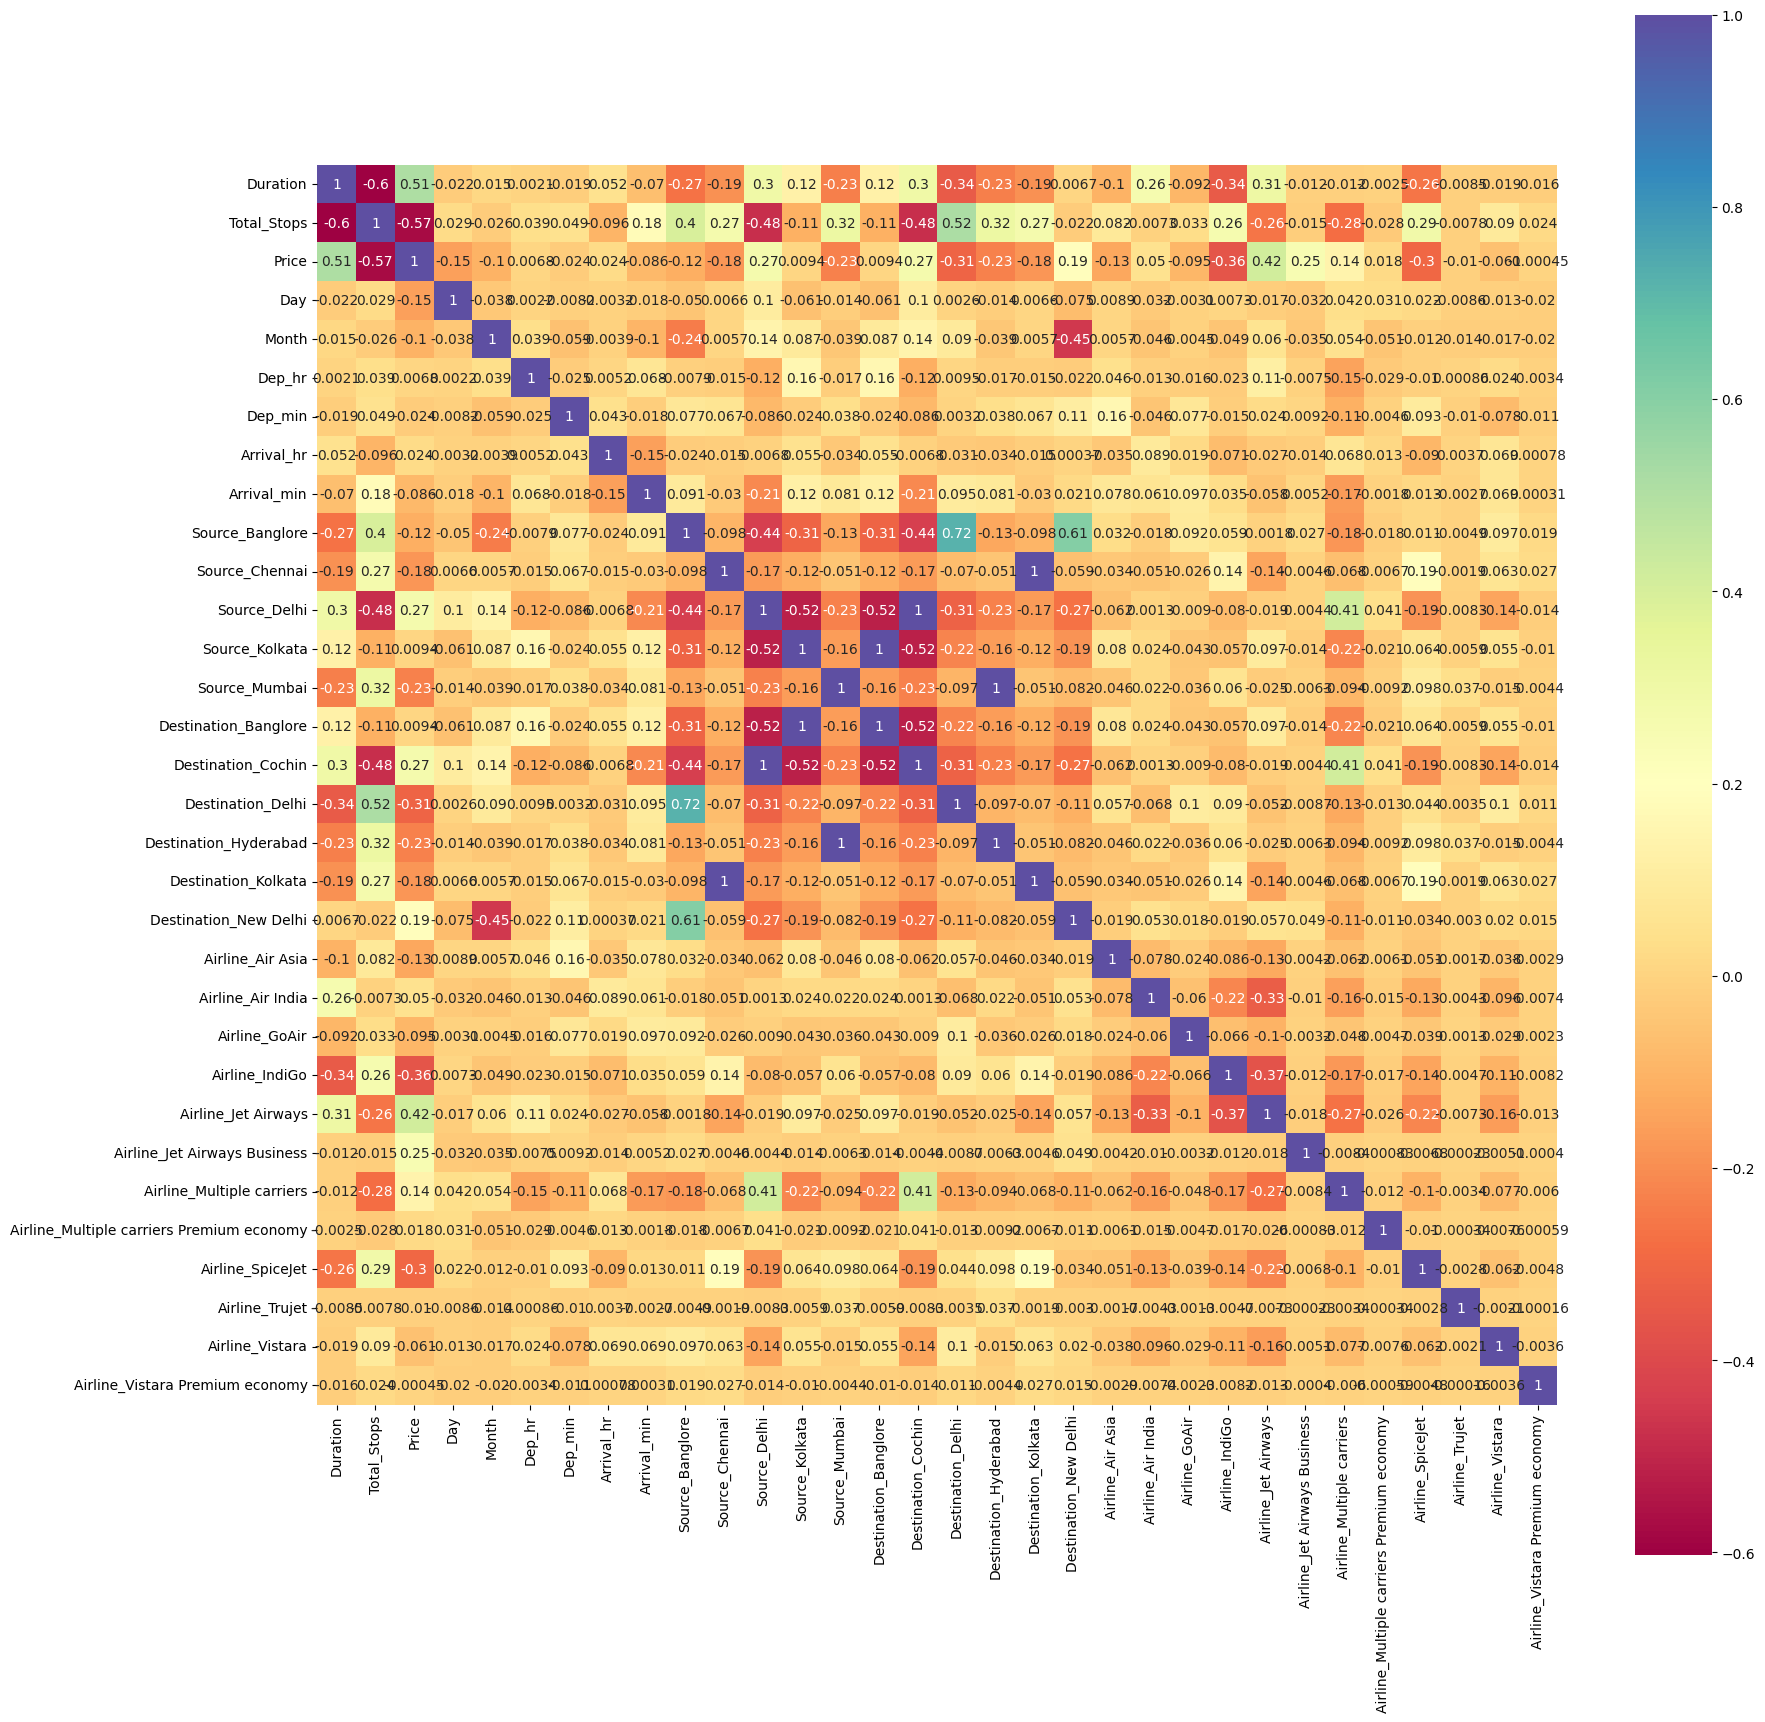

In [54]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='Spectral', square=True)

In [55]:
!pip install statsmodels

In [56]:
# Compute VIF data for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = train_df_case1.columns[1:]
vif["vif_Factor"] = [variance_inflation_factor(train_df_case1.iloc[:,1:].values, i) for i in range(train_df_case1.iloc[:,1:].shape[1])]
vif

/media/tinku/Education/iNEURON/ML/Projects/flight_fare_prediction/.venv/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,features,vif_Factor
0,Arrival_Time,1.045479
1,Duration,2.150151
2,Total_Stops,3.144120
3,Price,2.436829
4,Day,1.074750
5,Month,1.321251
6,Source_Banglore,inf
7,Source_Chennai,inf
8,Source_Delhi,inf
9,Source_Kolkata,inf


## Model Building



### CASE-1

In [57]:
train_df_case1.head(3)

,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month,Source_Banglore,Source_Chennai,Source_Delhi,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,22.20,1.10,170,4,3897,24,3,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,5.50,13.15,445,1,7662,1,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.25,4.25,1140,1,13882,9,6,0,0,1,...,0,0,1,0,0,0,0,0,0,0


#### Seperate Independent and Dependent Features

In [58]:
X1 = train_df_case1.drop(columns=['Price'])
y1 = train_df_case1.Price

In [59]:
X1.head(3)

,Dep_Time,Arrival_Time,Duration,Total_Stops,Day,Month,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,22.20,1.10,170,4,24,3,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,5.50,13.15,445,1,1,5,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,9.25,4.25,1140,1,9,6,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [60]:
y1.head(3)

0     3897
1     7662
2    13882
Name: Price, dtype: int64

#### Train Test Split

In [61]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=42)

#### Algorithm : DecisionTreeRegressor

In [62]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
# model training
dt_gen_1 = DecisionTreeRegressor()
dt_gen_1.fit(X1_train, y1_train)

DecisionTreeRegressor()

In [64]:
# model testing
y1_pred_dt = dt_gen_1.predict(X1_test)

In [65]:
# model performance
print("Train Score = ",dt_gen_1.score(X1_train, y1_train))
print("Test Score = ",dt_gen_1.score(X1_test, y1_test))

Train Score =  0.9707490055980877
Test Score =  0.7482205437012319


In [66]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y1_test, y1_pred_dt))
print('MSE:', metrics.mean_squared_error(y1_test, y1_pred_dt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred_dt)))
print('R2 Score:', metrics.r2_score(y1_test, y1_pred_dt))

MAE: 1326.410270809934
MSE: 5189936.584341487
RMSE: 2278.1432317441077
R2 Score: 0.7482205437012319


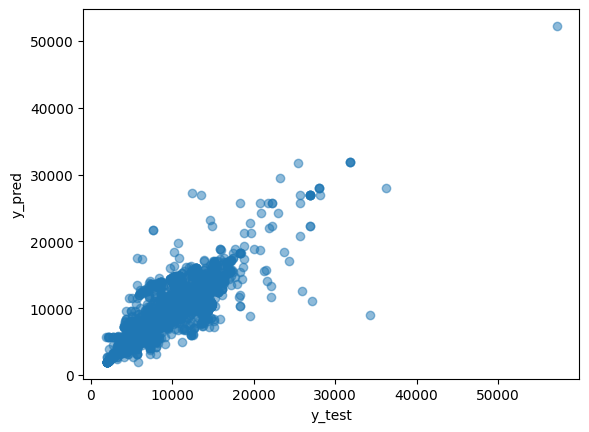

In [67]:
# predicted vs true
plt.scatter(y1_test, y1_pred_dt, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

#### Algorithm : RandomForestRegressor

In [68]:
from sklearn.ensemble import RandomForestRegressor
# model training
rf_gen_1 = RandomForestRegressor()
rf_gen_1.fit(X1_train, y1_train)

RandomForestRegressor()

In [69]:
# model testing
y1_pred_rf = rf_gen_1.predict(X1_test)

In [70]:
# model performance
print("Train Score = ",rf_gen_1.score(X1_train, y1_train))
print("Test Score = ",rf_gen_1.score(X1_test, y1_test))

Train Score =  0.9517973201844394
Test Score =  0.817763990255957


In [71]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y1_test, y1_pred_rf))
print('MSE:', metrics.mean_squared_error(y1_test, y1_pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred_rf)))
print('R2 Score:', metrics.r2_score(y1_test, y1_pred_rf))

MAE: 1160.9560734998809
MSE: 3756435.683270035
RMSE: 1938.1526470508031
R2 Score: 0.817763990255957


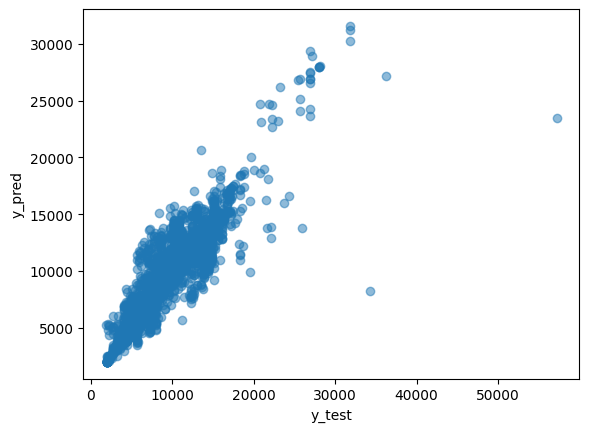

In [72]:
# predicted vs true
plt.scatter(y1_test, y1_pred_rf, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

#### Algorithm : GradientBoostingRegressor

In [73]:
from sklearn.ensemble import GradientBoostingRegressor
# model training
gb_gen_1 = GradientBoostingRegressor()
gb_gen_1.fit(X1_train, y1_train)

GradientBoostingRegressor()

In [74]:
# model testing
y1_pred_gb = rf_gen_1.predict(X1_test)

In [75]:
# model performance
print("Train Score = ",gb_gen_1.score(X1_train, y1_train))
print("Test Score = ",gb_gen_1.score(X1_test, y1_test))

Train Score =  0.7852800379697236
Test Score =  0.7863695492147861


In [76]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y1_test, y1_pred_gb))
print('MSE:', metrics.mean_squared_error(y1_test, y1_pred_gb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred_gb)))
print('R2 Score:', metrics.r2_score(y1_test, y1_pred_gb))

MAE: 1160.9560734998809
MSE: 3756435.683270035
RMSE: 1938.1526470508031
R2 Score: 0.817763990255957


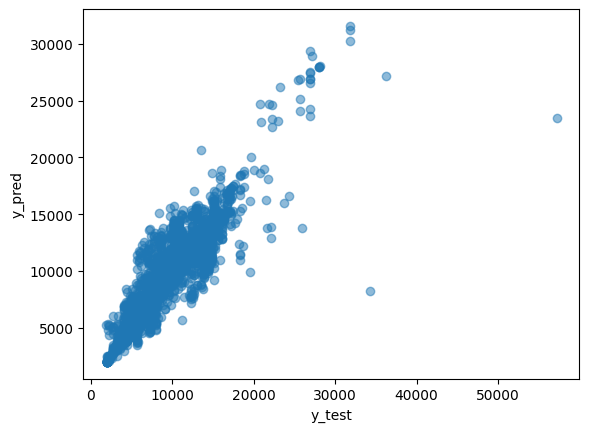

In [77]:
# predicted vs true
plt.scatter(y1_test, y1_pred_gb, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### CASE-2

In [78]:
train_df_case2.head(3)

,Duration,Total_Stops,Price,Day,Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Source_Banglore,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,170,4,3897,24,3,22,20,1,10,1,...,0,1,0,0,0,0,0,0,0,0
1,445,1,7662,1,5,5,50,13,15,0,...,0,0,0,0,0,0,0,0,0,0
2,1140,1,13882,9,6,9,25,4,25,0,...,0,0,1,0,0,0,0,0,0,0




#### Seperate Independent and Dependent Features



In [79]:
X2 = train_df_case2.drop(columns=['Price'])
y2 = train_df_case2.Price

In [80]:
X2.head(3)

,Duration,Total_Stops,Day,Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Source_Banglore,Source_Chennai,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,170,4,24,3,22,20,1,10,1,0,...,0,1,0,0,0,0,0,0,0,0
1,445,1,1,5,5,50,13,15,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1140,1,9,6,9,25,4,25,0,0,...,0,0,1,0,0,0,0,0,0,0


In [81]:
y2.head(3)

0     3897
1     7662
2    13882
Name: Price, dtype: int64

#### Train Test Split



In [82]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=42)

#### Algorithm : DecisionTreeRegressor

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# model training
dt_gen_2 = DecisionTreeRegressor()
dt_gen_2.fit(X2_train, y2_train)

DecisionTreeRegressor()

In [84]:
# model testing
y2_pred_dt = dt_gen_2.predict(X2_test)

# model performance
print("Train Score = ",dt_gen_2.score(X2_train, y2_train))
print("Test Score = ",dt_gen_2.score(X2_test, y2_test))

Train Score =  0.9707490055980877
Test Score =  0.7597033468901219


In [85]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y2_test, y2_pred_dt))
print('MSE:', metrics.mean_squared_error(y2_test, y2_pred_dt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred_dt)))
print('R2 Score:', metrics.r2_score(y2_test, y2_pred_dt))

MAE: 1304.9079620616499
MSE: 4953241.258849578
RMSE: 2225.587845682479
R2 Score: 0.7597033468901219


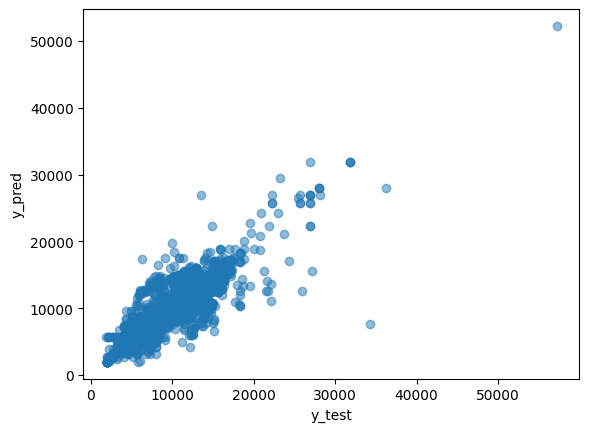

In [86]:
# predicted vs true
plt.scatter(y2_test, y2_pred_dt, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

#### Algorithm : RandomForestRegressor



In [87]:
from sklearn.ensemble import RandomForestRegressor
# model training
rf_gen_2 = RandomForestRegressor()
rf_gen_2.fit(X2_train, y2_train)

RandomForestRegressor()

In [88]:
# model testing
y2_pred_rf = rf_gen_2.predict(X2_test)



In [89]:
# model performance
print("Train Score = ",rf_gen_2.score(X2_train, y2_train))
print("Test Score = ",rf_gen_2.score(X2_test, y2_test))



Train Score =  0.9524994022270415
Test Score =  0.8198168030494252


In [90]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y2_test, y2_pred_rf))
print('MSE:', metrics.mean_squared_error(y2_test, y2_pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred_rf)))
print('R2 Score:', metrics.r2_score(y2_test, y2_pred_rf))

MAE: 1145.5834103862462
MSE: 3714120.998925882
RMSE: 1927.2054895433132
R2 Score: 0.8198168030494252


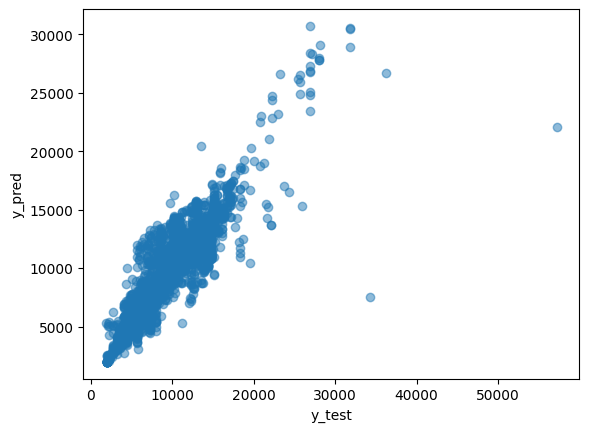

In [91]:
# predicted vs true
plt.scatter(y2_test, y2_pred_rf, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

#### Algorithm : GradientBoostingRegressor

In [92]:
from sklearn.ensemble import GradientBoostingRegressor
# model training
gb_gen_2 = GradientBoostingRegressor()
gb_gen_2.fit(X2_train, y2_train)

GradientBoostingRegressor()

In [93]:
# model testing
y2_pred_gb = rf_gen_2.predict(X2_test)

In [94]:
# model performance
print("Train Score = ",gb_gen_2.score(X2_train, y2_train))
print("Test Score = ",gb_gen_2.score(X2_test, y2_test))

Train Score =  0.7805053951328913
Test Score =  0.7813813631510734


In [95]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y2_test, y2_pred_gb))
print('MSE:', metrics.mean_squared_error(y2_test, y2_pred_gb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred_gb)))
print('R2 Score:', metrics.r2_score(y2_test, y2_pred_gb))

MAE: 1145.5834103862462
MSE: 3714120.998925882
RMSE: 1927.2054895433132
R2 Score: 0.8198168030494252


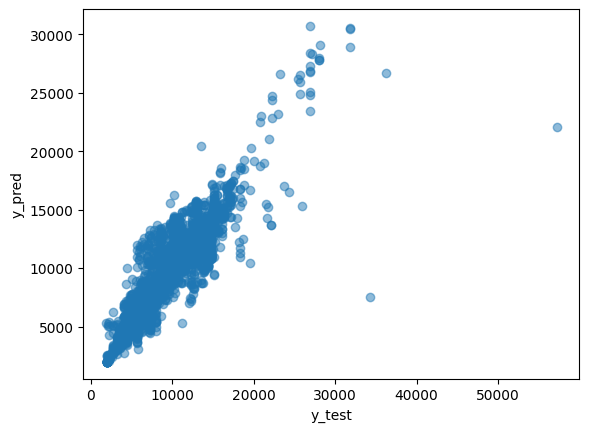

In [96]:
# predicted vs true
plt.scatter(y2_test, y2_pred_gb, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### Observation:

- We are getting highest acuracy in CASE-2 with RandomForestRegressor model

- We will perform Hyperparameter Tuning for model named **rf_gen_2**.

### Hyperparameter Tuning for the best performing model

In [97]:
from sklearn.model_selection import RandomizedSearchCV

In [98]:
param_distributions = {'max_depth': list(range(5,55,5)),
                        'max_features': ['log2', 'sqrt'],
                        'min_samples_leaf': list(range(1,6)),
                        'min_samples_split': list(range(1,100,2)),
                        'n_estimators': list(range(100,1300,100))}

In [99]:
random = RandomizedSearchCV(estimator=rf_gen_2, param_distributions=param_distributions, n_iter=30, cv=10, verbose=2, n_jobs=6)

In [100]:
random.fit(X2_train, y2_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=63, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=63, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=63, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=63, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=63, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=63, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=63, n_estimators=200; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=63, n_estimators=2

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=30,
                   n_jobs=6,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [1, 3, 5, 7, 9, 11,
                                                              13, 15, 17, 19,
                                                              21, 23, 25, 27,
                                                              29, 31, 33, 35,
                                                              37, 39, 41, 43,
                                                              45, 47, 49, 51,
                                                              53, 55, 57, 59, ...],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   verbose=2)

In [101]:
random.best_params_

{'n_estimators': 400,
 'min_samples_split': 21,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 35}

In [102]:
random.best_score_

0.78169961519402

In [103]:
random.best_estimator_

RandomForestRegressor(max_depth=35, max_features='log2', min_samples_split=21,
                      n_estimators=400)

In [104]:
gen_model = RandomForestRegressor(max_depth=30, max_features='log2', min_samples_split=7, n_estimators=400)
gen_model.fit(X2_train, y2_train)

RandomForestRegressor(max_depth=30, max_features='log2', min_samples_split=7,
                      n_estimators=400)

### Model Dumping

In [105]:
import pickle
pickle.dump(rf_gen_2,open('gen_pred_model.pkl','wb'))
pickle.dump(train_df_case2,open('train_data_modified.pkl','wb'))

### Testing with Dumped Model

In [106]:
best_model = pickle.load(open('gen_pred_model.pkl','rb'))

In [107]:
best_model.feature_names_in_

array(['Duration', 'Total_Stops', 'Day', 'Month', 'Dep_hr', 'Dep_min',
       'Arrival_hr', 'Arrival_min', 'Source_Banglore', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara',
       'Airline_Vistara Premium economy'], dtype=object)

In [108]:
pred = best_model.predict(X2_test)

In [109]:
print('R2 Score:', metrics.r2_score(y2_test, pred))

R2 Score: 0.8198168030494252


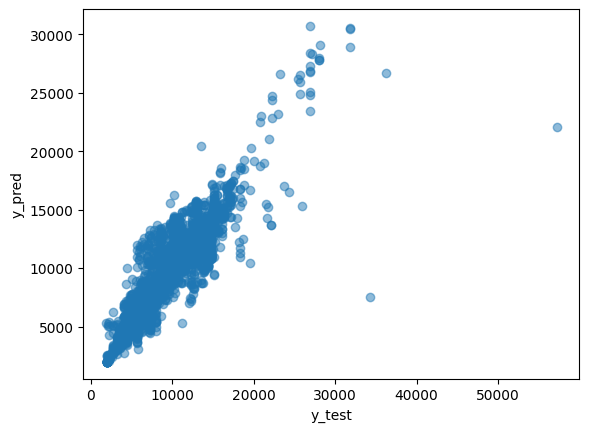

In [110]:
# predicted vs true
plt.scatter(y2_test, y2_pred_gb, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### Transform Test Data and Predict

In [111]:
def transformer_test_data(df: pd.DataFrame)-> pd.DataFrame:
    
    # initial validation
    features = ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']
    missing_features=[]
    for f in features:
        if f not in df.columns:
            missing_features.append(f)
    
    if len(missing_features) == 0:
        
        # drop unnecessary features if present
        useless = ["Route", "Additional_Info"]
        for i in useless:
            if i in df.columns:
                df.drop(columns=[i], inplace=True)
                
        # drop NaN values
        df.dropna(inplace=True)

        # type casting of Date_of_journey column
        df.Date_of_Journey = pd.to_datetime(df.Date_of_Journey, dayfirst=True)

        # creating Day and Month columns that contain integer values
        df["Day"] = df.Date_of_Journey.dt.day
        df["Month"] = df.Date_of_Journey.dt.month

        # Dropping "Date_of_Journey" column as it is not required anymore
        df.drop(columns=["Date_of_Journey"], inplace=True)

        # change data type of Dep_Time from object to datetime
        df.Dep_Time = pd.to_datetime(df.Dep_Time)

        # create two seperate columnsnamed "Dep_hr" and "Dep_min"
        df["Dep_hr"] = df.Dep_Time.dt.hour
        df["Dep_min"] = df.Dep_Time.dt.minute

        # Dropping "Dep_Time" column as it is not required anymore
        df.drop(columns=["Dep_Time"], inplace=True)

        # change data type of Arrival_Time from object to datetime
        df.Arrival_Time = pd.to_datetime(df.Arrival_Time)

        # create two seperate columnsnamed "Arrival_hr" and "Arrival_min"
        df["Arrival_hr"] = df.Arrival_Time.dt.hour
        df["Arrival_min"] = df.Arrival_Time.dt.minute

        # Dropping "Arrival_Time" column as it is not required anymore
        df.drop(columns=["Arrival_Time"], inplace=True)

        # we can convert all the values in Duration column into equivallent value in min
        def duration_in_min(dur):
            tt = 0
            for i in dur.split():
                if 'h' in i:
                    tt += int(i[:-1])*60
                if 'm' in i:
                    tt += int(i[:-1])
            return tt

        df.Duration = df.Duration.apply(duration_in_min)
        
        # Apply LabelEncoder on "Total_Stops" column
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        df.Total_Stops = le.fit_transform(df["Total_Stops"])
        
        print(list(df.columns))

        # insert missing categorical(Nominal) values
        airlines=['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet', 'Multiple carriers', 'GoAir',
                 'Vistara', 'Air Asia', 'Vistara Premium economy', 'Jet Airways Business',
                'Multiple carriers Premium economy', 'Trujet']
        source=['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai']
        destination=['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad']
        
        if len(airlines) > len(df.Airline.unique()):
            for i in set(airlines).difference(list(df.Airline.unique())):
                df.loc[len(df.index)] = [i, 'Kolkata', 'Banglore', 120, 0, 12, 8, 8, 30, 10, 30]

        # Apply OneHotEncode on "Airline", "Source", "Destination" columns
        df = pd.get_dummies(df, columns=["Source", "Destination", "Airline"])


        # final check that all required columns are present
        req_cols = ['Duration', 'Total_Stops', 'Day',
       'Month', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy']
        missing_columns=[]
        for col in req_cols:
            if col not in df.columns:
                missing_columns.append(col)
        if len(missing_columns) == 0:
            return df
        else:
            raise Exception(f"These features are missing in test data : {missing_columns}")
    else:
        raise Exception(f"These features are missing in test data : {missing_features}")

In [112]:
# import test data
test_df = pd.read_excel('/media/tinku/Education/iNEURON/ML/Projects/flight_fare_prediction/archive/Test_set.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [113]:
X_test = transformer_test_data(test_df)

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Day', 'Month', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min']


In [114]:
X_test.tail()

,Duration,Total_Stops,Day,Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Source_Banglore,Source_Chennai,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
2667,155,4,27,3,14,20,16,55,0,0,...,0,1,0,0,0,0,0,0,0,0
2668,395,0,6,3,21,50,4,25,0,0,...,0,0,1,0,0,0,0,0,0,0
2669,915,0,6,3,4,0,19,15,0,0,...,0,0,0,0,0,0,0,0,0,0
2670,860,0,15,6,4,55,19,15,0,0,...,0,0,0,0,1,0,0,0,0,0
2671,120,0,12,8,8,30,10,30,0,0,...,0,0,0,0,0,0,0,1,0,0


In [115]:
test_pred = best_model.predict(X_test)
test_pred

array([10749.43      ,  4244.78      , 15442.02666667, ...,
       13983.41      ,  7506.71      ,  8068.80266667])

#### Insert the predicted values in Price column in test data

In [116]:
# import test data
test_df = pd.read_excel('/media/tinku/Education/iNEURON/ML/Projects/flight_fare_prediction/archive/Test_set.xlsx')
test_df["Price"] = test_pred[:-1]
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,10749.430000
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,4244.780000
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,15442.026667
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,13264.912333
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,3705.560000


#### checking transformer_test_data function with invalid data

In [117]:
test_df = pd.read_excel('/media/tinku/Education/iNEURON/ML/Projects/flight_fare_prediction/archive/Test_set.xlsx')
data = test_df[test_df["Airline"]!="Air Asia"]
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included


In [119]:
X_data = transformer_test_data(data)
X_data.head()

Exception: These features are missing in test data : ['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Additional_Info']

### CASE - 3

#### Data Preperation for CASE-3

In [120]:
train_df_airline.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia'], dtype=object)

In [121]:
# dataset for each Airline
train_df_IndiGo = train_df_airline[train_df_airline.Airline == 'IndiGo']
train_df_AirIndia = train_df_airline[train_df_airline.Airline == 'Air India']
train_df_JetAirways = train_df_airline[train_df_airline.Airline == 'Jet Airways']
train_df_SpiceJet = train_df_airline[train_df_airline.Airline == 'SpiceJet']
train_df_Multiplecarriers = train_df_airline[train_df_airline.Airline == 'Multiple carriers']
train_df_GoAir = train_df_airline[train_df_airline.Airline == 'GoAir']
train_df_Vistara = train_df_airline[train_df_airline.Airline == 'Vistara']
train_df_AirAsia = train_df_airline[train_df_airline.Airline == 'Air Asia']

In [122]:
# creating lish of all df names corresponding to each airline
airline_names = ['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet', 'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia']
airline_df=[]
for i in airline_names:
    airline_df.append("train_df_"+i.replace(" ", ""))

airline_df

['train_df_IndiGo',
 'train_df_AirIndia',
 'train_df_JetAirways',
 'train_df_SpiceJet',
 'train_df_Multiplecarriers',
 'train_df_GoAir',
 'train_df_Vistara',
 'train_df_AirAsia']

In [123]:
train_df_airline.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22.20,1.10,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,5.50,13.15,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,9.25,4.25,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18.05,23.30,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16.50,21.35,285,1 stop,No info,13302,1,3,16,50,21,35


In [124]:
airline_df = [train_df_IndiGo, train_df_AirIndia, train_df_JetAirways, train_df_SpiceJet, train_df_Multiplecarriers, train_df_GoAir, train_df_Vistara, train_df_AirAsia]
for df in airline_df:
    print(df.Airline.unique())
    print(df.Source.unique())
    print(df.Destination.unique())
    print()

['IndiGo']
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
['New Delhi' 'Banglore' 'Delhi' 'Cochin' 'Kolkata' 'Hyderabad']

['Air India']
['Kolkata' 'Delhi' 'Chennai' 'Banglore' 'Mumbai']
['Banglore' 'Cochin' 'Kolkata' 'New Delhi' 'Hyderabad' 'Delhi']

['Jet Airways']
['Delhi' 'Banglore' 'Kolkata' 'Mumbai']
['Cochin' 'New Delhi' 'Banglore' 'Hyderabad' 'Delhi']

['SpiceJet']
['Kolkata' 'Delhi' 'Banglore' 'Chennai' 'Mumbai']
['Banglore' 'Cochin' 'New Delhi' 'Kolkata' 'Delhi' 'Hyderabad']

['Multiple carriers']
['Delhi']
['Cochin']

['GoAir']
['Delhi' 'Banglore' 'Kolkata']
['Cochin' 'Delhi' 'Banglore' 'New Delhi']

['Vistara']
['Banglore' 'Chennai' 'Mumbai' 'Kolkata' 'Delhi']
['Delhi' 'Kolkata' 'Hyderabad' 'New Delhi' 'Banglore' 'Cochin']

['Air Asia']
['Banglore' 'Kolkata' 'Delhi']
['Delhi' 'Banglore' 'Cochin' 'New Delhi']



In [125]:
# data = ['2023-01-11T12:34', '2023-01-11T03:05', 'Delhi', 'Cochin', '0', 'Multiple carriers']         
for s in train_df_airline.Source.unique():   
    print("Source -> ", s)
    print(train_df_airline[train_df_airline.Source == s].Airline.value_counts())

Source ->  Banglore
Jet Airways    788
IndiGo         523
Air India      332
Vistara        185
SpiceJet       181
GoAir           93
Air Asia        89
Name: Airline, dtype: int64
Source ->  Kolkata
Jet Airways    1256
Air India       512
IndiGo          445
SpiceJet        300
Vistara         183
Air Asia        150
GoAir            25
Name: Airline, dtype: int64
Source ->  Delhi
Jet Airways          1586
Multiple carriers    1196
Air India             746
IndiGo                705
SpiceJet               87
Air Asia               80
GoAir                  76
Vistara                45
Name: Airline, dtype: int64
Source ->  Chennai
IndiGo       184
SpiceJet     128
Vistara       43
Air India     25
Name: Airline, dtype: int64
Source ->  Mumbai
Jet Airways    219
IndiGo         196
Air India      136
SpiceJet       122
Vistara         23
Name: Airline, dtype: int64


In [131]:
airline_df = [train_df_IndiGo, train_df_AirIndia, train_df_JetAirways, train_df_SpiceJet, train_df_Multiplecarriers, train_df_GoAir, train_df_Vistara, train_df_AirAsia]

def transform_airline_df(df):
    # drop unnecessary features
    df.drop(columns=['Airline', 'Route', 'Dep_Time', 'Arrival_Time', 'Additional_Info'], inplace=True)

    # OneHotEncoding on "Source", "Destination"
    df = pd.get_dummies(df, columns=["Source", "Destination"])

    # LabelEncoding on Total_Stops
    df.Total_Stops = le.fit_transform(df["Total_Stops"])
    return df

# for df in airline_df:
#     df = transform_airline_df(df)
#     print(df.Airline.unique(), df.shape) 
    
#     print(df.shape, '\n', df.columns) 
#     print("=@="*50)

In [132]:
train_df_IndiGo.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22.20,1.10,170,non-stop,No info,3897,24,3,22,20,1,10
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18.05,23.30,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16.50,21.35,285,1 stop,No info,13302,1,3,16,50,21,35
11,IndiGo,Kolkata,Banglore,CCU → BLR,20.20,22.55,155,non-stop,No info,4174,18,4,20,20,22,55
14,IndiGo,Kolkata,Banglore,CCU → BLR,17.15,19.50,155,non-stop,No info,4804,24,4,17,15,19,50


#### Model Building for each Airline

##### Indigo

In [133]:
train_df_IndiGo_tf = transform_airline_df(train_df_IndiGo)
X_IndiGo = train_df_IndiGo_tf.drop(columns=["Price"]) 
y_IndiGo = train_df_IndiGo_tf.Price
X_IndiGo_train, X_IndiGo_test, y_IndiGo_train, y_IndiGo_test = train_test_split(X_IndiGo, y_IndiGo, test_size=0.33, random_state=42)
IndiGo = RandomForestRegressor()
IndiGo.fit(X_IndiGo_train, y_IndiGo_train)

/tmp/ipykernel_149750/2200169594.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Airline', 'Route', 'Dep_Time', 'Arrival_Time', 'Additional_Info'], inplace=True)


RandomForestRegressor()

In [134]:
y_IndoGo_train_pred = IndiGo.predict(X_IndiGo_train)
y_IndoGo_test_pred = IndiGo.predict(X_IndiGo_test)



In [135]:
# model performance
print("Train Score = ",IndiGo.score(X_IndiGo_train, y_IndoGo_train))
print("Test Score = ",IndiGo.score(X_IndiGo_test, y_IndoGo_test))

Train Score =  0.9735604466413355
Test Score =  0.8120233569025643


In [183]:
IndiGo.feature_names_in_.shape

(19,)

In [136]:
IndiGo.predict([list(X_IndiGo.iloc[13])])


/media/tinku/Education/iNEURON/ML/Projects/flight_fare_prediction/.venv/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([7229.99])

In [137]:
[list(X_IndiGo.iloc[13])]

[[630, 0, 15, 5, 15, 0, 1, 30, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]]

In [138]:
IndiGo.predict([[230, 0, 15, 5, 15, 0, 1, 30, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

/media/tinku/Education/iNEURON/ML/Projects/flight_fare_prediction/.venv/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([5120.4])

##### AirIndia

In [139]:
train_df_AirIndia_tf = transform_airline_df(train_df_AirIndia)
X_AirIndia = train_df_AirIndia_tf.drop(columns=["Price"]) 
y_AirIndia = train_df_AirIndia_tf.Price
X_AirIndia_train, X_AirIndia_test, y_AirIndia_train, y_AirIndia_test = train_test_split(X_AirIndia, y_AirIndia, test_size=0.33, random_state=42)
AirIndia = RandomForestRegressor()
AirIndia.fit(X_AirIndia_train, y_AirIndia_train)

/tmp/ipykernel_149750/2200169594.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Airline', 'Route', 'Dep_Time', 'Arrival_Time', 'Additional_Info'], inplace=True)


RandomForestRegressor()

In [140]:
# model performance
print("Train Score = ", AirIndia.score(X_AirIndia_train, y_AirIndia_train))
print("Test Score = ", AirIndia.score(X_AirIndia_test, y_AirIndia_test))

Train Score =  0.9633194887547871
Test Score =  0.8208167291276393


In [184]:
AirIndia.feature_names_in_.shape

(19,)

In [141]:
AirIndia.predict([[230, 0, 15, 5, 15, 0, 1, 30, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

/media/tinku/Education/iNEURON/ML/Projects/flight_fare_prediction/.venv/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([7179.05])

##### JetAirways

In [142]:
train_df_JetAirways_tf = transform_airline_df(train_df_JetAirways)
X_JetAirways = train_df_JetAirways_tf.drop(columns=["Price"]) 
y_JetAirways = train_df_JetAirways_tf.Price
X_JetAirways_train, X_JetAirways_test, y_JetAirways_train, y_JetAirways_test = train_test_split(X_JetAirways, y_JetAirways, test_size=0.33, random_state=42)
JetAirways = RandomForestRegressor()
JetAirways.fit(X_JetAirways_train, y_JetAirways_train)

/tmp/ipykernel_149750/2200169594.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Airline', 'Route', 'Dep_Time', 'Arrival_Time', 'Additional_Info'], inplace=True)


RandomForestRegressor()

In [143]:
# model performance
print("Train Score = ", JetAirways.score(X_JetAirways_train, y_JetAirways_train))
print("Test Score = ", JetAirways.score(X_JetAirways_test, y_JetAirways_test))

Train Score =  0.9118092391297598
Test Score =  0.6130907046627694


In [144]:
JetAirways.predict([[230, 0, 15, 5, 15, 0, 1, 30, 1, 0, 0, 0, 0, 0, 1, 0, 0]])

/media/tinku/Education/iNEURON/ML/Projects/flight_fare_prediction/.venv/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([11898.78583333])

##### SpiceJet

In [145]:
train_df_SpiceJet_tf = transform_airline_df(train_df_SpiceJet)
X_SpiceJet = train_df_SpiceJet_tf.drop(columns=["Price"]) 
y_SpiceJet = train_df_SpiceJet_tf.Price
X_SpiceJet_train, X_SpiceJet_test, y_SpiceJet_train, y_SpiceJet_test = train_test_split(X_SpiceJet, y_SpiceJet, test_size=0.33, random_state=42)
SpiceJet = RandomForestRegressor()
SpiceJet.fit(X_SpiceJet_train, y_SpiceJet_train)

/tmp/ipykernel_149750/2200169594.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Airline', 'Route', 'Dep_Time', 'Arrival_Time', 'Additional_Info'], inplace=True)


RandomForestRegressor()

In [146]:
# model performance
print("Train Score = ", SpiceJet.score(X_SpiceJet_train, y_SpiceJet_train))
print("Test Score = ", SpiceJet.score(X_SpiceJet_test, y_SpiceJet_test))

Train Score =  0.9641418489120887
Test Score =  0.7737002008874712


In [147]:
SpiceJet.predict([[230, 0, 15, 5, 15, 0, 1, 30, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

/media/tinku/Education/iNEURON/ML/Projects/flight_fare_prediction/.venv/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([4971.455])

##### Multiplecarriers

In [148]:
train_df_Multiplecarriers_tf = transform_airline_df(train_df_Multiplecarriers)
X_Multiplecarriers = train_df_Multiplecarriers_tf.drop(columns=["Price"]) 
y_Multiplecarriers = train_df_Multiplecarriers_tf.Price
X_Multiplecarriers_train, X_Multiplecarriers_test, y_Multiplecarriers_train, y_Multiplecarriers_test = train_test_split(X_Multiplecarriers, y_Multiplecarriers, test_size=0.33, random_state=42)
Multiplecarriers = RandomForestRegressor()
Multiplecarriers.fit(X_Multiplecarriers_train, y_Multiplecarriers_train)

/tmp/ipykernel_149750/2200169594.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Airline', 'Route', 'Dep_Time', 'Arrival_Time', 'Additional_Info'], inplace=True)


RandomForestRegressor()

In [149]:
# model performance
print("Train Score = ", Multiplecarriers.score(X_Multiplecarriers_train, y_Multiplecarriers_train))
print("Test Score = ", Multiplecarriers.score(X_Multiplecarriers_test, y_Multiplecarriers_test))

Train Score =  0.9154984614566914
Test Score =  0.617419964689822


In [150]:
X_Multiplecarriers_train.Source_Delhi.value_counts()

1    801
Name: Source_Delhi, dtype: int64

In [151]:
y_Multiplecarriers_train.value_counts()

13377    30
13587    28
9646     21
6795     18
8266     18
         ..
8601      1
24528     1
7887      1
8565      1
11761     1
Name: Price, Length: 248, dtype: int64

In [152]:
X_Multiplecarriers_test.head()

,Duration,Total_Stops,Day,Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Source_Delhi,Destination_Cochin
5522,535,0,27,6,10,20,19,15,1,1
2152,570,0,6,3,6,0,15,30,1,1
8993,900,0,12,6,6,0,21,0,1,1
9878,830,0,27,6,11,40,1,30,1,1
517,630,0,15,5,8,30,19,0,1,1


In [153]:
y_Multiplecarriers_test.head()

5522     7741
2152    15147
8993     7005
9878     5797
517      9627
Name: Price, dtype: int64

In [154]:
Multiplecarriers.predict([[535, 0, 27, 6, 10, 20, 19, 15, 1, 1]])

/media/tinku/Education/iNEURON/ML/Projects/flight_fare_prediction/.venv/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([8418.57])

##### GoAir

In [155]:
train_df_GoAir_tf = transform_airline_df(train_df_GoAir)
X_GoAir = train_df_GoAir_tf.drop(columns=["Price"]) 
y_GoAir = train_df_GoAir_tf.Price
X_GoAir_train, X_GoAir_test, y_GoAir_train, y_GoAir_test = train_test_split(X_GoAir, y_GoAir, test_size=0.33, random_state=42)
GoAir = RandomForestRegressor()
GoAir.fit(X_GoAir_train, y_GoAir_train)

/tmp/ipykernel_149750/2200169594.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Airline', 'Route', 'Dep_Time', 'Arrival_Time', 'Additional_Info'], inplace=True)


RandomForestRegressor()

In [156]:
# model performance
print("Train Score = ", GoAir.score(X_GoAir_train, y_GoAir_train))
print("Test Score = ", GoAir.score(X_GoAir_test, y_GoAir_test))

Train Score =  0.9521499482721512
Test Score =  0.5041998681266219


In [157]:
GoAir.predict([[230, 0, 15, 5, 15, 0, 1, 30, 1, 0, 0, 0, 1, 0, 0]])

/media/tinku/Education/iNEURON/ML/Projects/flight_fare_prediction/.venv/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([11264.97])

##### Vistara

In [158]:
train_df_Vistara_tf = transform_airline_df(train_df_Vistara)
X_Vistara = train_df_Vistara_tf.drop(columns=["Price"]) 
y_Vistara = train_df_Vistara_tf.Price
X_Vistara_train, X_Vistara_test, y_Vistara_train, y_Vistara_test = train_test_split(X_Vistara, y_Vistara, test_size=0.33, random_state=42)
Vistara = RandomForestRegressor()
Vistara.fit(X_Vistara_train, y_Vistara_train)

/tmp/ipykernel_149750/2200169594.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Airline', 'Route', 'Dep_Time', 'Arrival_Time', 'Additional_Info'], inplace=True)


RandomForestRegressor()

In [159]:
# model performance
print("Train Score = ", Vistara.score(X_Vistara_train, y_Vistara_train))
print("Test Score = ", Vistara.score(X_Vistara_test, y_Vistara_test))

Train Score =  0.9618971023537907
Test Score =  0.8174643884821173


In [160]:
Vistara.predict([[230, 0, 15, 5, 15, 0, 1, 30, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

/media/tinku/Education/iNEURON/ML/Projects/flight_fare_prediction/.venv/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([7277.89])

##### AirAsia

In [161]:
train_df_AirAsia_tf = transform_airline_df(train_df_AirAsia)
X_AirAsia = train_df_AirAsia_tf.drop(columns=["Price"]) 
y_AirAsia = train_df_AirAsia_tf.Price
X_AirAsia_train, X_AirAsia_test, y_AirAsia_train, y_AirAsia_test = train_test_split(X_AirAsia, y_AirAsia, test_size=0.33, random_state=42)
AirAsia = RandomForestRegressor()
AirAsia.fit(X_AirAsia_train, y_AirAsia_train)

/tmp/ipykernel_149750/2200169594.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Airline', 'Route', 'Dep_Time', 'Arrival_Time', 'Additional_Info'], inplace=True)


RandomForestRegressor()

In [162]:
# model performance
print("Train Score = ", AirAsia.score(X_AirAsia_train, y_AirAsia_train))
print("Test Score = ", AirAsia.score(X_AirAsia_test, y_AirAsia_test))

Train Score =  0.9578085281167095
Test Score =  0.7765318351254906


In [163]:
AirAsia.predict([[230, 0, 15, 5, 15, 0, 1, 30, 1, 0, 0, 0, 1, 0, 0]])

/media/tinku/Education/iNEURON/ML/Projects/flight_fare_prediction/.venv/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([5864.01])

#### Dumping All Airline Models 

In [166]:
import pickle
pickle.dump(IndiGo, open('/media/tinku/Education/iNEURON/ML/Projects/flight_fare_prediction/pkl_files/IndiGo.pkl', 'wb'))
pickle.dump(AirIndia, open('/media/tinku/Education/iNEURON/ML/Projects/flight_fare_prediction/pkl_files/AirIndia.pkl', 'wb'))
pickle.dump(JetAirways, open('/media/tinku/Education/iNEURON/ML/Projects/flight_fare_prediction/pkl_files/JetAirways.pkl', 'wb'))
pickle.dump(SpiceJet, open('/media/tinku/Education/iNEURON/ML/Projects/flight_fare_prediction/pkl_files/SpiceJet.pkl', 'wb'))
pickle.dump(Multiplecarriers, open('/media/tinku/Education/iNEURON/ML/Projects/flight_fare_prediction/pkl_files/Multiplecarriers.pkl', 'wb'))
pickle.dump(GoAir, open('/media/tinku/Education/iNEURON/ML/Projects/flight_fare_prediction/pkl_files/GoAir.pkl', 'wb'))
pickle.dump(Vistara, open('/media/tinku/Education/iNEURON/ML/Projects/flight_fare_prediction/pkl_files/Vistara.pkl', 'wb'))
pickle.dump(AirAsia, open('/media/tinku/Education/iNEURON/ML/Projects/flight_fare_prediction/pkl_files/AirAsia.pkl', 'wb'))


In [167]:
# DICT WITH ALL Airline Models
airline_model_dict = {
    "AirAsia":AirAsia,
    "IndiGo": IndiGo,
    "AirIndia":AirIndia,
    "JetAirways":JetAirways,
    "SpiceJet":SpiceJet,
    "Multiplecarriers": Multiplecarriers,
    "GoAir":GoAir,
    "Vistara":Vistara
}

In [178]:
# DICT THAT CONTAINS LIST OF  AVAILABLE AIRLINE FROM ANY PARTICULAR SOURCE
avl_airline = {}
for s in list(train_df_airline.Source.unique()):
    avl_airline[s] = [x.replace(" ", "") for x in train_df_airline[train_df_airline.Source == s].Airline.unique()]


In [179]:

avl_airline

{'Banglore': ['IndiGo',
  'JetAirways',
  'AirIndia',
  'Vistara',
  'AirAsia',
  'SpiceJet',
  'GoAir'],
 'Kolkata': ['AirIndia',
  'IndiGo',
  'SpiceJet',
  'JetAirways',
  'Vistara',
  'GoAir',
  'AirAsia'],
 'Delhi': ['JetAirways',
  'Multiplecarriers',
  'AirIndia',
  'SpiceJet',
  'GoAir',
  'IndiGo',
  'Vistara',
  'AirAsia'],
 'Chennai': ['AirIndia', 'Vistara', 'IndiGo', 'SpiceJet'],
 'Mumbai': ['Vistara', 'AirIndia', 'JetAirways', 'IndiGo', 'SpiceJet']}

## END OF NOTEBOOK